In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML models and utilities
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Save model
import pickle


In [2]:
# Load Titanic dataset
df = pd.read_csv("../data/train.csv")  # use "../data/train.csv" if notebook is in notebooks/

# Quick overview
print(df.head())
print(df.info())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing values)
df = df.drop(columns=['Cabin'])

# Fill missing Fare (if any) with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Feature selection
feature_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']
X = df[feature_cols]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data preprocessing complete.")


Data preprocessing complete.


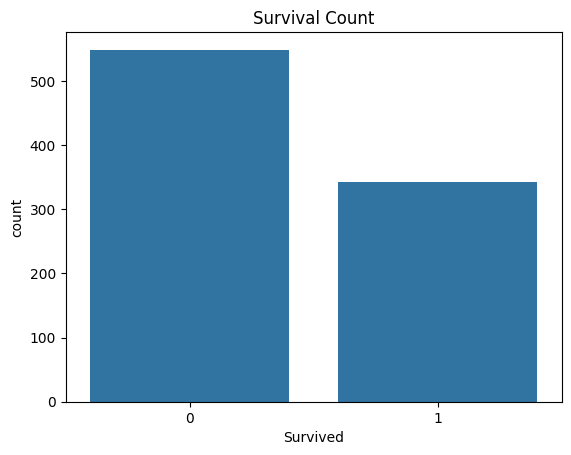

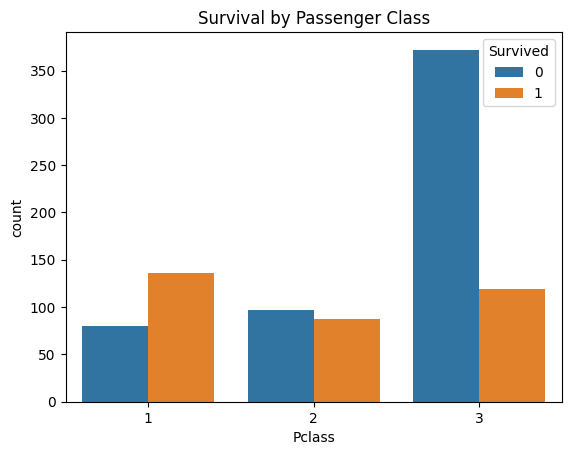

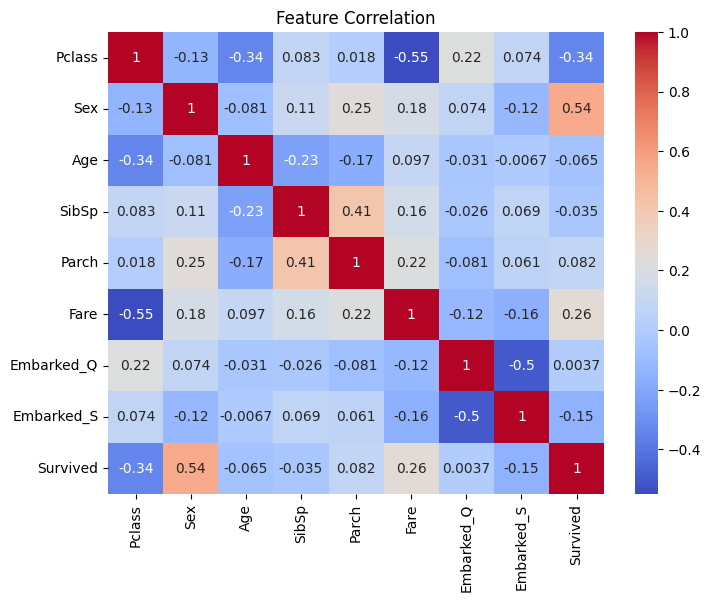

In [4]:
# Count of survivors
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[feature_cols + ['Survived']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [6]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [7]:
scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:", scores.mean())


Random Forest CV Accuracy: 0.8081036971941498


In [8]:
# Save the trained Random Forest model
with open("../model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Model saved as model.pkl")


Model saved as model.pkl


In [9]:
# Load model to test
with open("../model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test prediction on first 5 rows
print(loaded_model.predict(X_test.head()))


[0 0 0 1 0]
